In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df =pd.read_csv('D:/Naveen/Courses/Cricket analytics workshop/Masterclass/IPL_ball_by_ball_updated.csv')

In [3]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[(df.innings==1) | (df.innings==2)]

In [5]:
df.innings.unique()

array([2, 1], dtype=int64)

In [6]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [7]:
dho_df = df[df.striker == 'MS Dhoni']

In [8]:
ddf1 = pd.DataFrame(dho_df.groupby('bowling_team')['runs_off_bat'].sum()).reset_index()
ddf1

,bowling_team,runs_off_bat
0,Deccan Chargers,281
1,Delhi Capitals,139
2,Delhi Daredevils,487
3,Gujarat Lions,83
4,Kings XI Punjab,595
5,Kochi Tuskers Kerala,23
6,Kolkata Knight Riders,501
7,Mumbai Indians,682
8,Pune Warriors,135
9,Punjab Kings,12


In [9]:
ddf2 = pd.DataFrame(dho_df.groupby('bowling_team')['ball'].count()).reset_index()
ddf2

,bowling_team,ball
0,Deccan Chargers,258
1,Delhi Capitals,120
2,Delhi Daredevils,351
3,Gujarat Lions,73
4,Kings XI Punjab,398
5,Kochi Tuskers Kerala,19
6,Kolkata Knight Riders,387
7,Mumbai Indians,554
8,Pune Warriors,90
9,Punjab Kings,15


In [10]:
ddf3 = ddf1.merge(ddf2, on ='bowling_team', how='left')


In [11]:
ddf3['SR'] = 100* ddf3['runs_off_bat']/ddf3['ball']

In [12]:
ddf3

,bowling_team,runs_off_bat,ball,SR
0,Deccan Chargers,281,258,108.914729
1,Delhi Capitals,139,120,115.833333
2,Delhi Daredevils,487,351,138.746439
3,Gujarat Lions,83,73,113.698630
4,Kings XI Punjab,595,398,149.497487
5,Kochi Tuskers Kerala,23,19,121.052632
6,Kolkata Knight Riders,501,387,129.457364
7,Mumbai Indians,682,554,123.104693
8,Pune Warriors,135,90,150.000000
9,Punjab Kings,12,15,80.000000


In [13]:
ddf3= ddf3[ddf3.ball >=60]

In [14]:
ddf3.sort_values('SR', ascending = False)

,bowling_team,runs_off_bat,ball,SR
8,Pune Warriors,135,90,150.000000
4,Kings XI Punjab,595,398,149.497487
12,Sunrisers Hyderabad,477,332,143.674699
2,Delhi Daredevils,487,351,138.746439
11,Royal Challengers Bangalore,836,613,136.378467
6,Kolkata Knight Riders,501,387,129.457364
10,Rajasthan Royals,495,394,125.634518
7,Mumbai Indians,682,554,123.104693
1,Delhi Capitals,139,120,115.833333
3,Gujarat Lions,83,73,113.698630


In [15]:
ddf3.reset_index(inplace = True, drop = True)

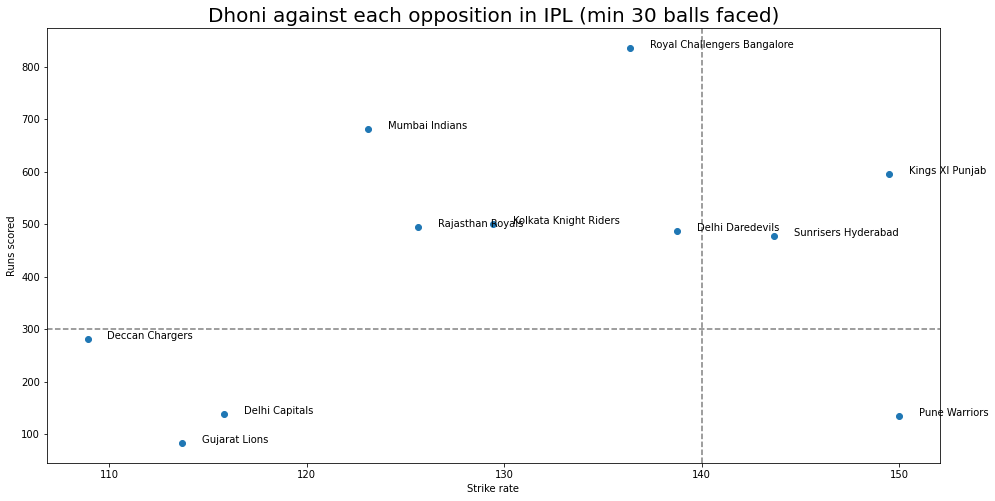

In [16]:
plt.figure(figsize = (16, 8))
plt.scatter(ddf3.SR, ddf3.runs_off_bat)

for i in range(len(ddf3)):
     plt.text(ddf3['SR'][i]+1, ddf3['runs_off_bat'][i] , ddf3['bowling_team'][i] )
 
plt.axvline(140, ls = '--', color = 'grey')
plt.axhline(300, ls = '--', color = 'grey')
plt.title('Dhoni against each opposition in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

# Conclusion

It is clear from the graph that Dhoni likes to score more runs against teams like Punjab,SRH.. at a high strike rate(140+)

Also he is weak against Gujarat Titans and Delhi capitals,..(We have taken min balls to be faced as 60)